### Image Classification CNNs With Image Augmentation and Dropouts

In [0]:
from __future__ import absolute_import, print_function, division, unicode_literals

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

import tensorflow as tf

TensorFlow 2.x selected.


In [0]:
from matplotlib import style
from tensorflow.keras.preprocessing.image import ImageDataGenerator

style.use('ggplot')

In [0]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
import logging

logger = tf.get_logger()
logger.setLevel(logging.ERROR)

### Loading the Data

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file(fname='cats_and_dogs_filtered.zip', 
                                  origin=_URL, extract=True)

68608000/68606236 [==============================] - 1s 0us/step


In [0]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [0]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
print("{}\n".format(base_dir))

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
print("{}".format(train_dir))
print("{}\n".format(validation_dir))

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
print("{}".format(train_cats_dir))
print("{}\n".format(train_dogs_dir))

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("{}".format(validation_cats_dir))
print("{}".format(validation_dogs_dir))

/root/.keras/datasets/cats_and_dogs_filtered

/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/validation

/root/.keras/datasets/cats_and_dogs_filtered/train/cats
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs

/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [0]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_validation = len(os.listdir(validation_cats_dir))
num_dogs_validation = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_validation = num_cats_validation + num_dogs_validation

print("Total training examples   : {}".format(total_train))
print("Total validation examples : {}".format(total_validation))

Total training examples   : 2000
Total validation examples : 1000


### Setting Model Parameters

In [0]:
BATCH_SIZE = 100
IMG_SIZE = 150

### Data Augmentation

In [0]:
def plot_the_image(images_arr):
  fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))
  axes = axes.flatten()

  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
    ax.grid(False)
  
  plt.tight_layout()
  plt.show()

#### Flipping the Image Horizontally

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

In [0]:
train_data_gen = image_gen.flow_from_directory(directory=train_dir, 
                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                               class_mode='binary', 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


In [0]:
print(train_data_gen[0][1])
print(len(train_data_gen[0]))
print(len(train_data_gen[0][0]))
print(len(train_data_gen[0][0][0]))
print(train_data_gen[0][0][0])

[0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0.]
2
100
150
[[[0.4901961  0.5254902  0.56078434]
  [0.4901961  0.5254902  0.54509807]
  [0.4901961  0.5254902  0.54509807]
  ...
  [0.43921572 0.4901961  0.45098042]
  [0.44705886 0.49803925 0.45882356]
  [0.43137258 0.48235297 0.4431373 ]]

 [[0.49411768 0.5294118  0.5647059 ]
  [0.5058824  0.5411765  0.56078434]
  [0.5019608  0.5372549  0.5568628 ]
  ...
  [0.454902   0.5058824  0.47058827]
  [0.4431373  0.49411768 0.45882356]
  [0.44705886 0.49803925 0.46274513]]

 [[0.50980395 0.54509807 0.5803922 ]
  [0.5176471  0.5529412  0.57254905]
  [0.5137255  0.54901963 0.5686275 ]
  ...
  [0.4666667  0.5176471  0.4901961 ]
  [0.4784314  0.5294118  0.5019608 ]
  [0.47058827 0.52156866 0.494117

In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
np.array([augmented_images]).shape

(1, 5, 150, 150, 3)

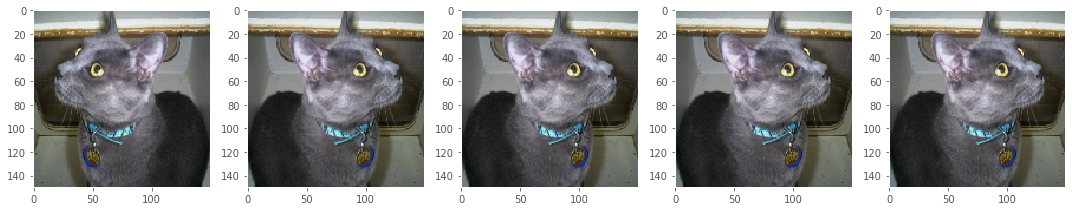

In [0]:
plot_the_image(images_arr=augmented_images)

In [0]:
print(len(train_data_gen)) # '20' Batches

print(len(train_data_gen[0])) # 20 Batches with '2' elements --> Images and Labels

print(len(train_data_gen[0][0])) # 20 Batches with 2 elements -- > Images and Labels,
                                 # where each element is of size '100' (BATCH_SIZE)

print(len(train_data_gen[0][0][0])) # 20 Batches with 2 elements --> Images and Labels,
                                    # where each element is of size 100 and within the elements, 
                                    # we have '150' sub arrays

print(len(train_data_gen[0][0][99][149])) # 20 Batches with 2 elements --> Images and Labels,
                                          # where each element is of size 100 and within the elements, 
                                          # we have 150 sub arrays, and every sub array is again packed up, 
                                          # with '150' tiny arrays

print(len(train_data_gen[19][0][99][149][149])) # 20 Batches with 2 elements --> Images and Labels,
                                                # where each element is of size 100 and within the elements, 
                                                # we have 150 sub arrays, and every sub array is again packed up, 
                                                # with '150' tiny arrays and every tiny array is packed up with 3 elements

20
2
100
150
150
3


#### Rotating the Image

In [0]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

In [0]:
train_data_gen = image_gen.flow_from_directory(directory=train_dir, 
                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                               class_mode='binary', 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
np.array([augmented_images]).shape

(1, 5, 150, 150, 3)

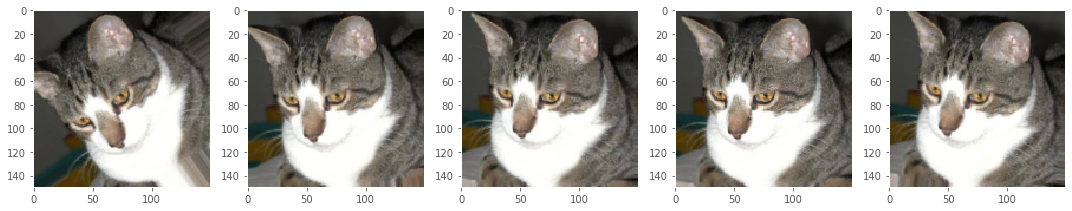

In [0]:
plot_the_image(images_arr=augmented_images)

#### Zoom the Image

In [0]:
image_gen = ImageDataGenerator(zoom_range=0.5, rescale=1./255)

In [0]:
train_data_gen = image_gen.flow_from_directory(directory=train_dir, 
                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                               class_mode='binary', 
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True)

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
np.array([augmented_images]).shape

(1, 5, 150, 150, 3)

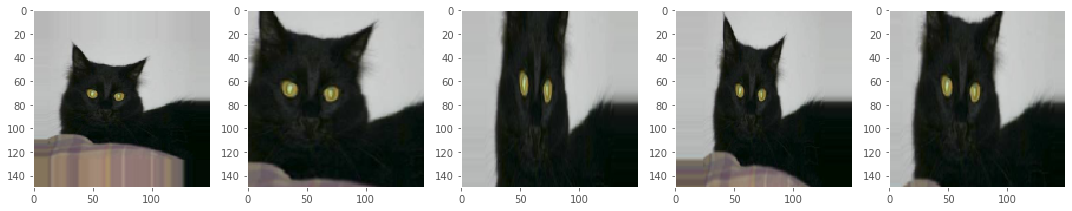

In [0]:
plot_the_image(images_arr=augmented_images)

#### Putting it all together

In [0]:
image_train_gen = ImageDataGenerator(rotation_range=40, 
                                     width_shift_range=0.2, 
                                     height_shift_range=0.2, 
                                     shear_range=0.2, 
                                     zoom_range=0.2, 
                                     fill_mode='nearest', 
                                     horizontal_flip=True, 
                                     rescale=1./255)

In [0]:
train_data_gen = image_train_gen.flow_from_directory(directory=train_dir, 
                                                     target_size=(IMG_SIZE, IMG_SIZE), 
                                                     class_mode='binary', 
                                                     batch_size=BATCH_SIZE, 
                                                     shuffle=True)

Found 2000 images belonging to 2 classes.


In [0]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
np.array([augmented_images]).shape

(1, 5, 150, 150, 3)

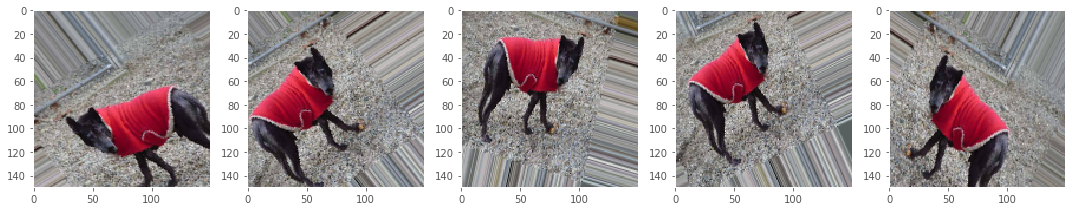

In [0]:
plot_the_image(images_arr=augmented_images)

In [0]:
image_validation_gen = ImageDataGenerator(rescale=1./255)

In [0]:
validation_data_gen = image_validation_gen.flow_from_directory(directory=validation_dir, 
                                                               target_size=(IMG_SIZE, IMG_SIZE), 
                                                               class_mode='binary', 
                                                               batch_size=BATCH_SIZE, 
                                                               shuffle=True)

Found 1000 images belonging to 2 classes.


### Define the Model

In [0]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu, 
                         input_shape=(150, 150, 3)), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=64, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=128, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Conv2D(filters=128, 
                         kernel_size=(3, 3), 
                         activation=tf.nn.relu), 
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2), 

  tf.keras.layers.Dropout(rate=0.5), 

  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
  tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
])

### Compile the Model

In [0]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

### Model Summary

In [0]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### Fit the Model

In [0]:
EPOCHS = 70

history = model_1.fit_generator(generator=train_data_gen, 
                                steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))), 
                                epochs=EPOCHS, 
                                validation_data=validation_data_gen, 
                                validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))))

Epoch 1/70
20/20 [==============================] - 25s 1s/step - loss: 0.7026 - accuracy: 0.5040 - val_loss: 0.6887 - val_accuracy: 0.5130
Epoch 2/70
20/20 [==============================] - 20s 1s/step - loss: 0.6887 - accuracy: 0.5450 - val_loss: 0.6824 - val_accuracy: 0.5060
Epoch 3/70
20/20 [==============================] - 20s 1s/step - loss: 0.6774 - accuracy: 0.5720 - val_loss: 0.6667 - val_accuracy: 0.5170
Epoch 4/70
20/20 [==============================] - 20s 1s/step - loss: 0.6600 - accuracy: 0.5760 - val_loss: 0.6253 - val_accuracy: 0.6460
Epoch 5/70
20/20 [==============================] - 20s 997ms/step - loss: 0.6347 - accuracy: 0.6300 - val_loss: 0.6253 - val_accuracy: 0.6370
Epoch 6/70
20/20 [==============================] - 20s 1s/step - loss: 0.6320 - accuracy: 0.6395 - val_loss: 0.6179 - val_accuracy: 0.6550
Epoch 7/70
20/20 [==============================] - 20s 1s/step - loss: 0.6262 - accuracy: 0.6390 - val_loss: 0.6258 - val_accuracy: 0.6460
Epoch 8/70
20/20 

In [0]:
data = {
    'train_acc' : history.history['accuracy'], 
    'train_loss' : history.history['loss'], 
    'val_acc' : history.history['val_accuracy'], 
    'val_loss' : history.history['val_loss']
}

history_df = pd.DataFrame(data=data, index=history.epoch)

print(len(history_df))
display(history_df.head(10))
display(history_df.tail(10))

70


,train_acc,train_loss,val_acc,val_loss
0,0.5040,0.702635,0.513,0.688654
1,0.5450,0.688736,0.506,0.682407
2,0.5720,0.677445,0.517,0.666687
3,0.5760,0.659982,0.646,0.625312
4,0.6300,0.634653,0.637,0.625327
5,0.6395,0.632030,0.655,0.617917
6,0.6390,0.626203,0.646,0.625847
7,0.6305,0.628487,0.688,0.608637
8,0.6745,0.606010,0.700,0.565861
9,0.6460,0.633077,0.628,0.643071


,train_acc,train_loss,val_acc,val_loss
60,0.8390,0.355900,0.802,0.431264
61,0.8415,0.377945,0.824,0.388570
62,0.8480,0.352080,0.807,0.411917
63,0.8400,0.353412,0.811,0.407885
64,0.8490,0.343105,0.813,0.421222
65,0.8360,0.353536,0.811,0.405977
66,0.8420,0.361869,0.820,0.399787
67,0.8425,0.354515,0.786,0.481770
68,0.8565,0.327275,0.814,0.419860
69,0.8530,0.341172,0.824,0.393155


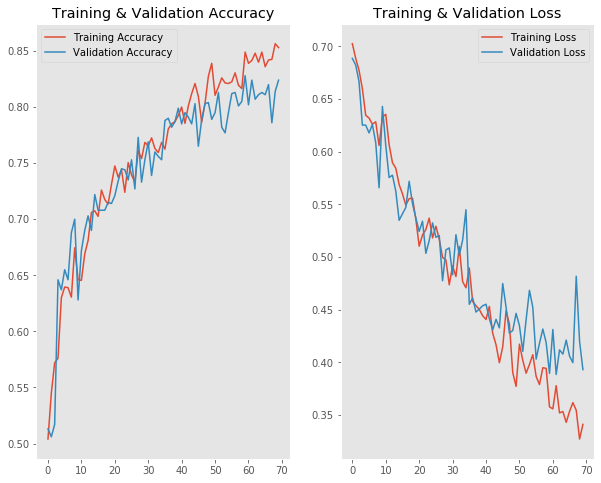

In [0]:
plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.title("Training & Validation Accuracy")
plt.plot(history_df.index, history_df['train_acc'], label="Training Accuracy")
plt.plot(history_df.index, history_df['val_acc'], label="Validation Accuracy")
plt.grid(False)
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Training & Validation Loss")
plt.plot(history_df.index, history_df['train_loss'], label="Training Loss")
plt.plot(history_df.index, history_df['val_loss'], label="Validation Loss")
plt.grid(False)
plt.legend()

plt.savefig('./foo.png')
plt.show()